**House Price Prediction based on Real Estate Data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
import statsmodels.api as sm
import sklearn.metrics as sk

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.DataFrame(pd.read_csv("/content/Real estate xls.csv"))

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#First 5 values
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#Last 5 values 
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [6]:
#Get all the keys of the dataset Dictionary 
data.keys()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
#Display all the columns with corresponding count of non null observation and along with their data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
# total numbers of Row and Columns 
data.shape

(414, 8)

In [9]:
#Statistical Measurement of dataset
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
# Missing Value Checking
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Stem and Leaf Plotting

In [11]:
!pip install stemgraphic
import stemgraphic

(<Figure size 540x846 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f61a0f52a50>)

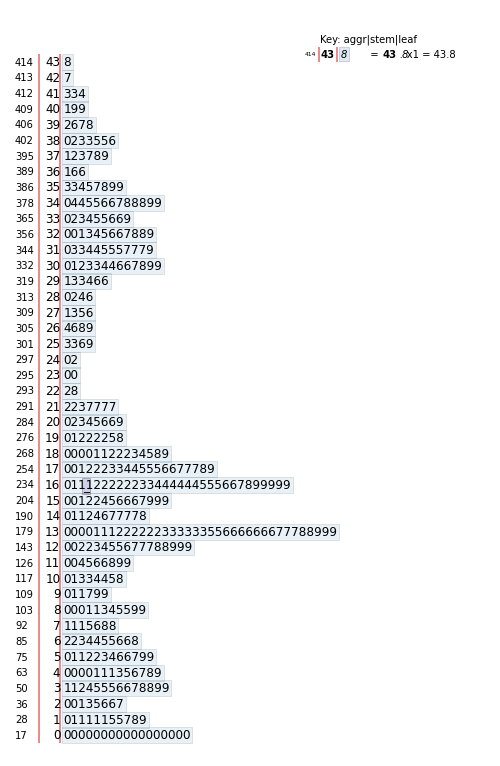

In [12]:
stemgraphic.stem_graphic(data["X2 house age"],scale=1)

(<Figure size 540x38862 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f619efd0690>)

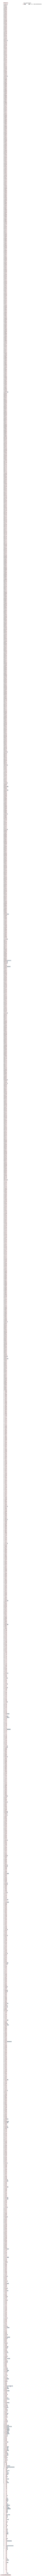

In [13]:
stemgraphic.stem_graphic(data["X3 distance to the nearest MRT station"],scale=3)

(<Figure size 540x270 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f619aecc650>)

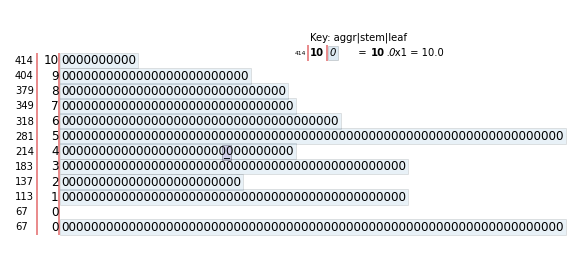

In [14]:
stemgraphic.stem_graphic(data["X4 number of convenience stores"],scale=1)

(<Figure size 540x90 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f619b191890>)

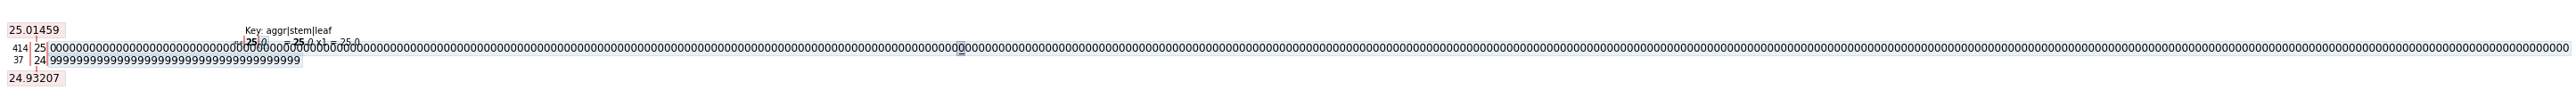

In [15]:
stemgraphic.stem_graphic(data["X5 latitude"],scale=1)

(<Figure size 540x2052 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f619af62c50>)

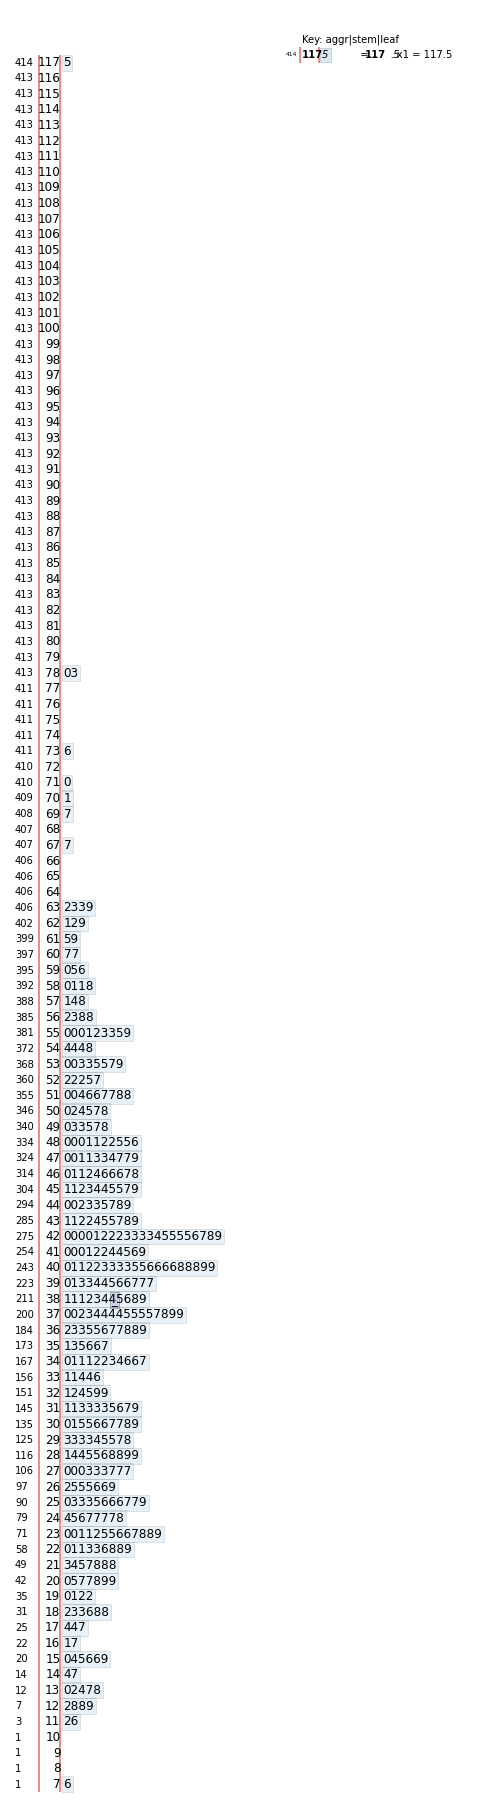

In [16]:
stemgraphic.stem_graphic(data["Y house price of unit area"],scale=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



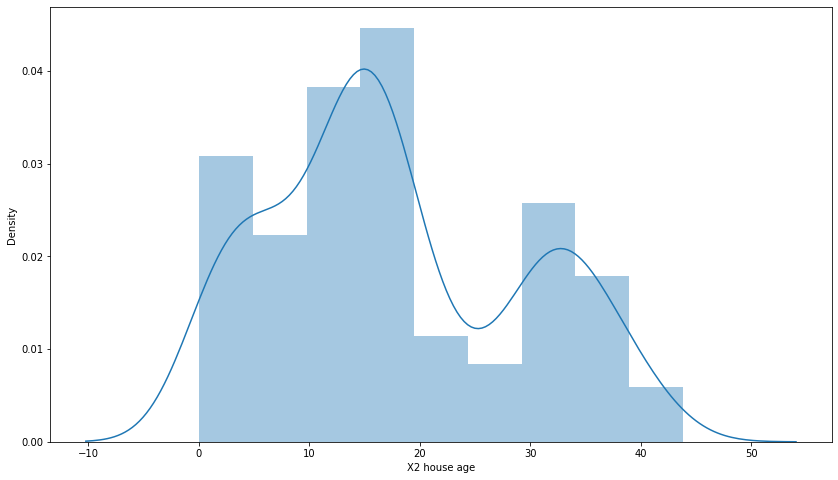

In [17]:
plt.figure(figsize=(14,8))
sns.distplot(data['X2 house age'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



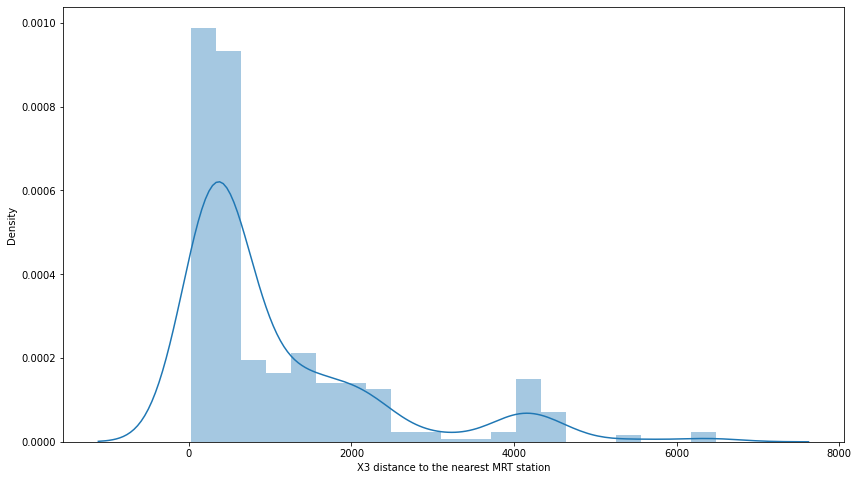

In [18]:
plt.figure(figsize=(14,8))
sns.distplot(data['X3 distance to the nearest MRT station'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



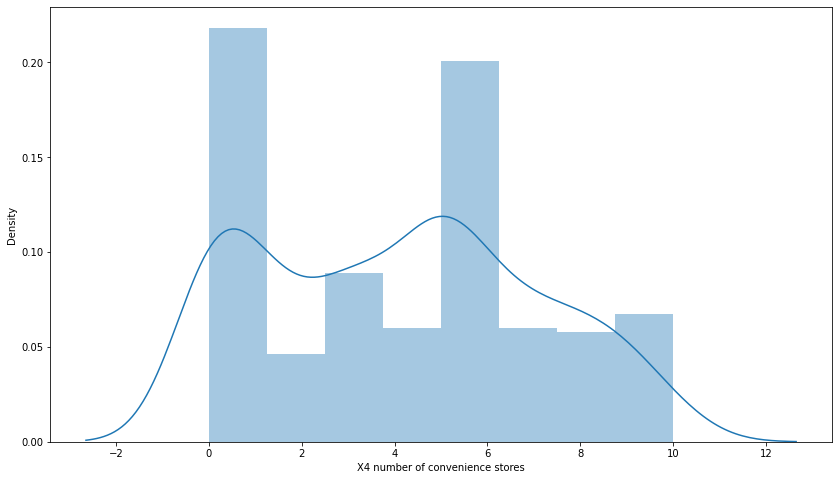

In [19]:
plt.figure(figsize=(14,8))
sns.distplot(data['X4 number of convenience stores'].dropna())

No. of stores are Uniformly Distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



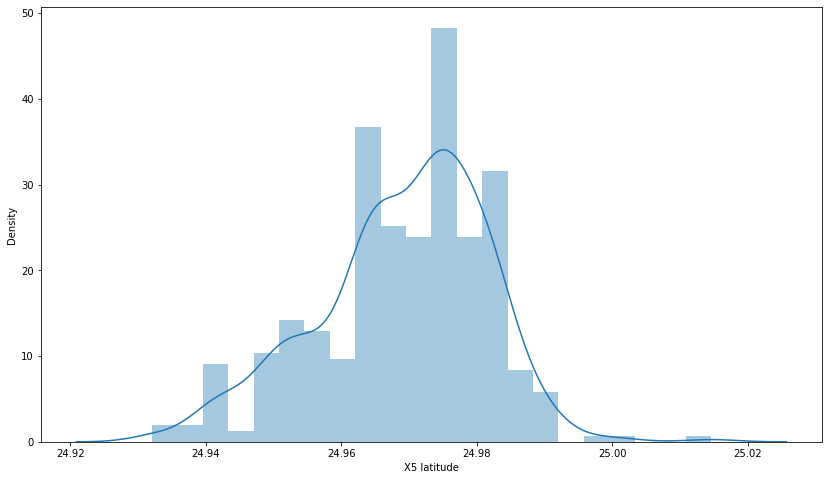

In [20]:
plt.figure(figsize=(14,8))
sns.distplot(data['X5 latitude'].dropna())

latitude data are Negatively skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



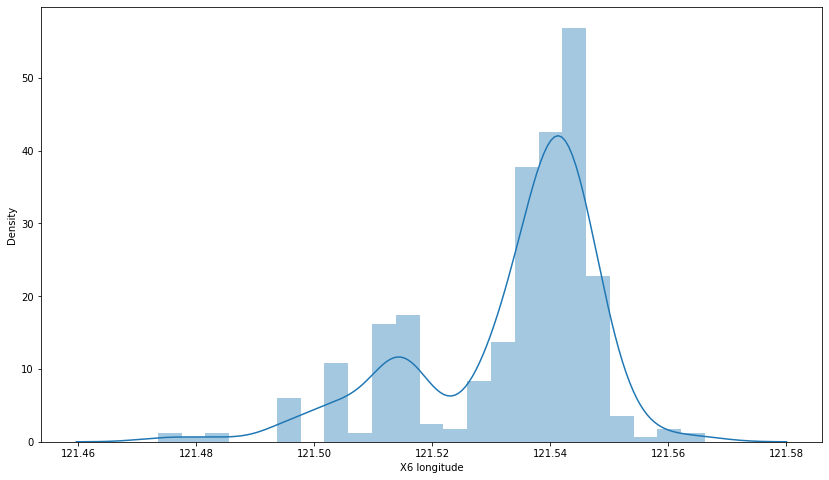

In [21]:
plt.figure(figsize=(14,8))
sns.distplot(data['X6 longitude'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



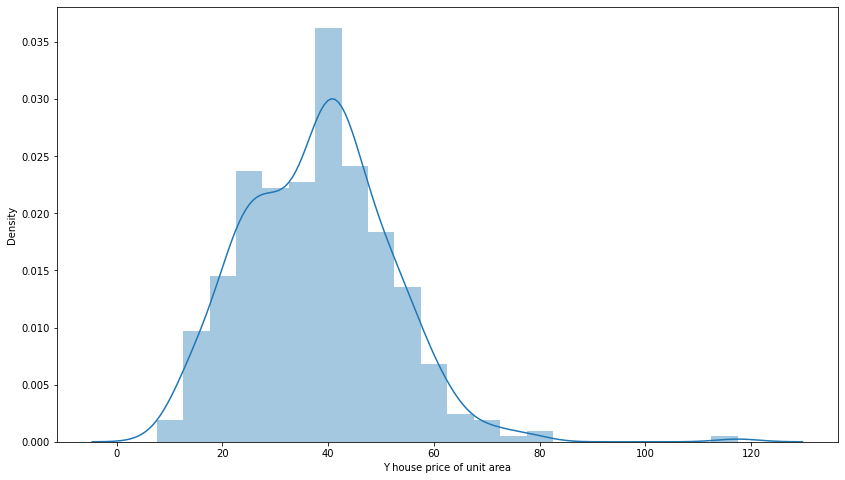

In [22]:
plt.figure(figsize=(14,8))
sns.distplot(data['Y house price of unit area'].dropna())

Price data are more or less Normally Distributed

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning:

invalid value encountered in subtract



Text(0.5, 1.0, 'Normal Q-Q plot of log(price)')

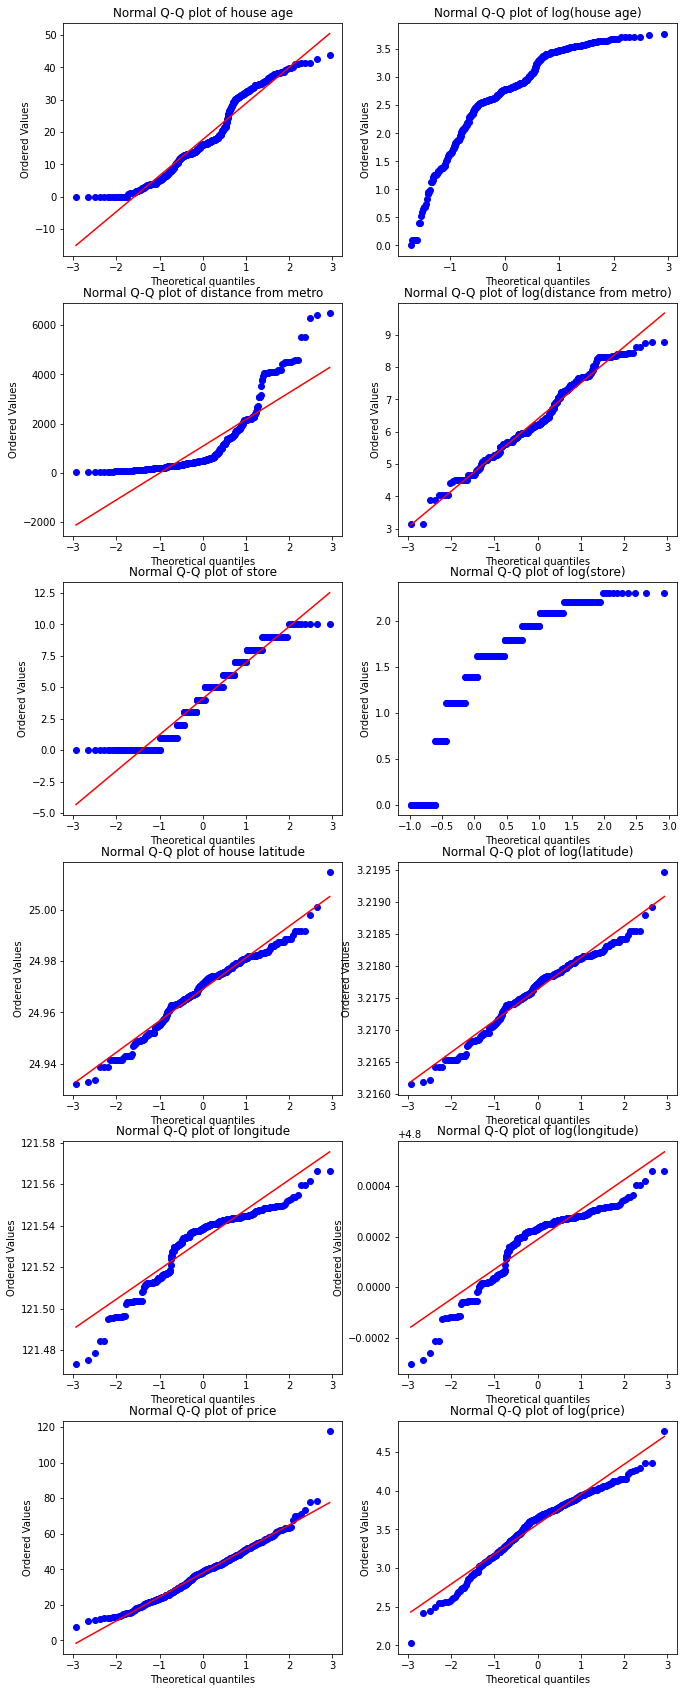

In [23]:
# Checking for Normal / Lognormal Distribution 
plt.figure(figsize=(11,30)) 
plt.subplot(6,2,1) 
stats.probplot(data['X2 house age'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of house age') 
plt.subplot(6,2,2) 
stats.probplot(np.log(data['X2 house age']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(house age)') 
plt.subplot(6,2,3) 
stats.probplot(data['X3 distance to the nearest MRT station'], dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of distance from metro') 
plt.subplot(6,2,4) 
stats.probplot(np.log(data['X3 distance to the nearest MRT station']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(distance from metro)')
plt.subplot(6,2,5) 
stats.probplot(data['X4 number of convenience stores'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of store') 
plt.subplot(6,2,6) 
stats.probplot(np.log(data['X4 number of convenience stores']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(store)') 
plt.subplot(6,2,7) 
stats.probplot(data['X5 latitude'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of house latitude') 
plt.subplot(6,2,8) 
stats.probplot(np.log(data['X5 latitude']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(latitude)') 
plt.subplot(6,2,9) 
stats.probplot(data['X6 longitude'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of longitude') 
plt.subplot(6,2,10) 
stats.probplot(np.log(data['X6 longitude']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(longitude)') 
plt.subplot(6,2,11) 
stats.probplot(data['Y house price of unit area'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of price') 
plt.subplot(6,2,12) 
stats.probplot(np.log(data['Y house price of unit area']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(price)') 


In [24]:
data1= data.drop(["No","X1 transaction date"],axis=1)

In [25]:
data1.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
# Correlation Checking
data1.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


From the above Correlation Calculation we can Conclude that :

1.House Age and House price are Weakly Negatively Correlated

2.Distance to the Nearest Metro station	and House Price are Highly Negatively Correlated.

3.Number of Stores and House Price are moderately Positively Correlated.

4.latitude and House price are Positively Correlated.

5.longitude and House price are Positively Correlated.

6.Number of Stores and Distance to the Nearest Metro station are Negatively Correlated.

7.Number of Stores and latitude are Negatively Correlated.

8.Number of Stores and longitude are highly Negatively Correlated.




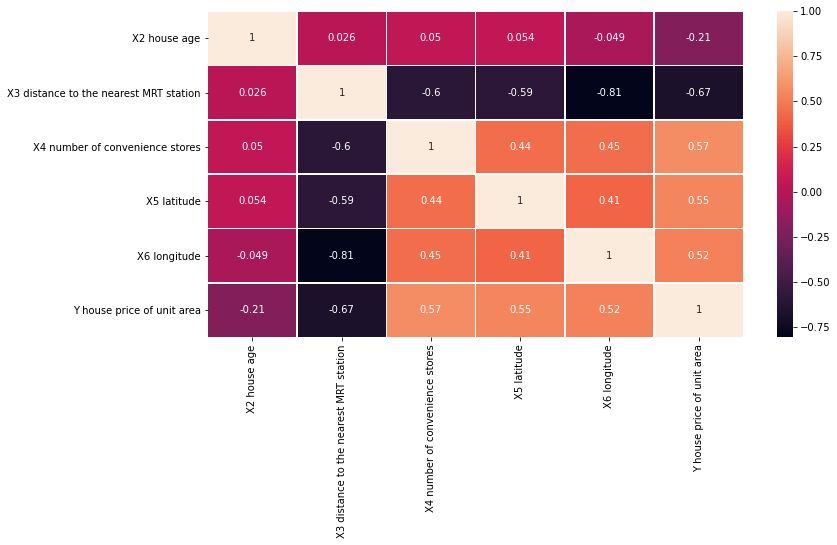

In [27]:
# Heat Map for checking Correlation
plt.figure(figsize = (12,6))
sns.heatmap(data1.corr(), annot = True,linewidth=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



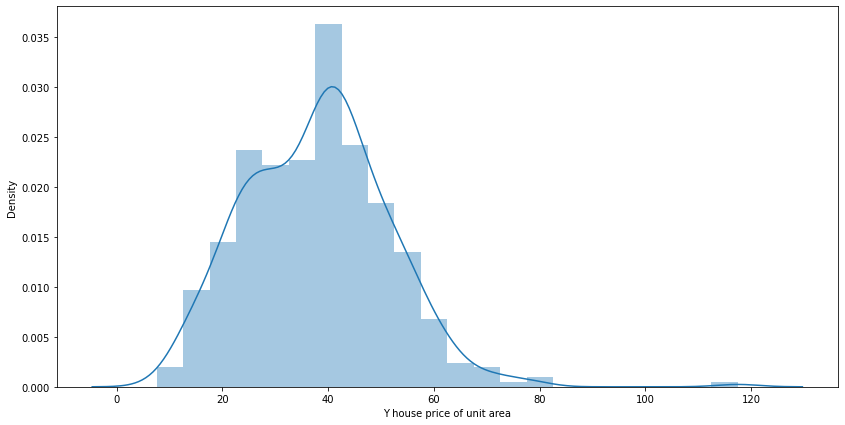

In [28]:
plt.figure(figsize=(14,7))
sns.distplot(data1['Y house price of unit area'].fillna(100))

House Price is Negatively Skewed Approximately.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



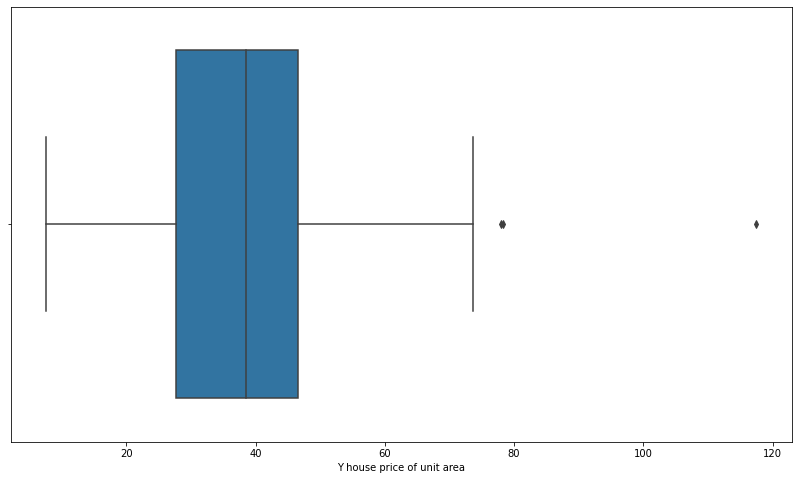

In [29]:
plt.figure(figsize=(14,8))
sns.boxplot(data1['Y house price of unit area'])

IQR Technique for Outlier Detection

In [30]:
percentile25 = data1['Y house price of unit area'].quantile(0.25)
percentile75 = data1['Y house price of unit area'].quantile(0.75)

In [31]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [32]:
data1[data1['Y house price of unit area'] > upper_limit]
data1[data1['Y house price of unit area'] < lower_limit]

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [33]:
new_data = data1[(data1['Y house price of unit area'] <= upper_limit) & (data1['Y house price of unit area'] >= lower_limit)]
new_data.shape

(411, 6)

In [34]:
data2=new_data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

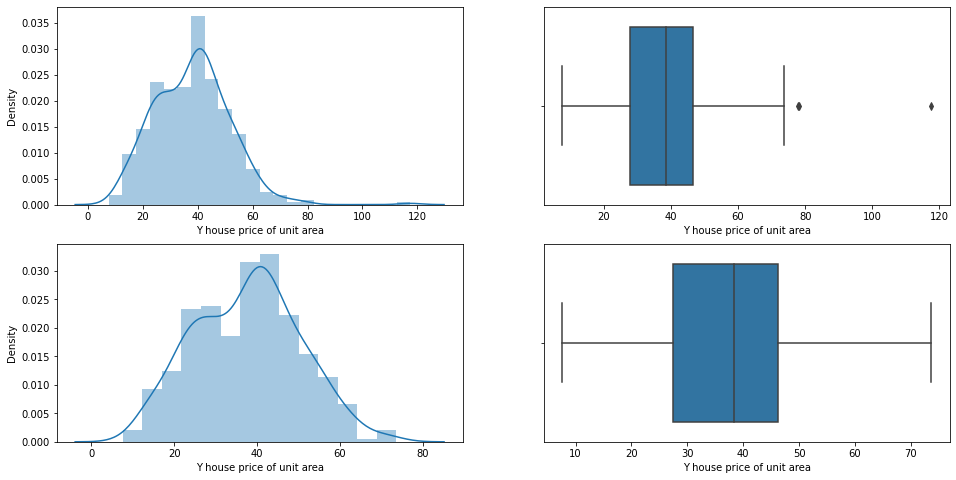

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data1['Y house price of unit area'])
plt.subplot(2,2,2)
sns.boxplot(data1['Y house price of unit area'])
plt.subplot(2,2,3)
sns.distplot(data2['Y house price of unit area'])
plt.subplot(2,2,4)
sns.boxplot(data2['Y house price of unit area'])
plt.show()

Assumption of  Multiple Linear Regression 
1. Linearity
2. Check for Homoscedasticity
3. Check for Normality of error terms/residuals
4. No autocorrelation of residuals i.e, Corr(ui,uj)=0 for all i ≠ j
5. No perfect Multicollinearity 

1. Linearity Check

<Figure size 1152x720 with 0 Axes>

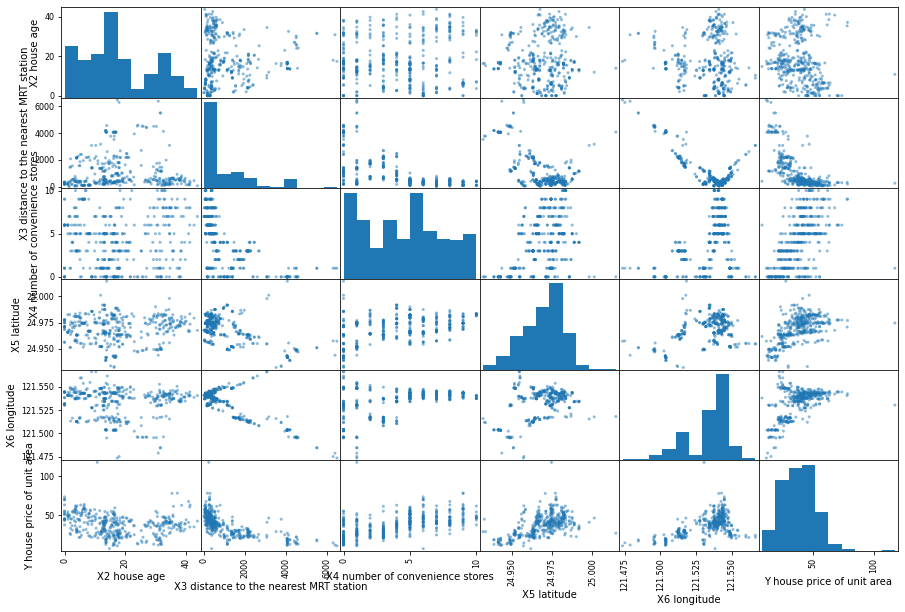

In [36]:
plt.figure(figsize=(16,10))
from pandas.plotting import scatter_matrix
scatter_matrix(data1[["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude","Y house price of unit area"]], figsize=(15,10)) 
plt.show()

<Figure size 1008x576 with 0 Axes>

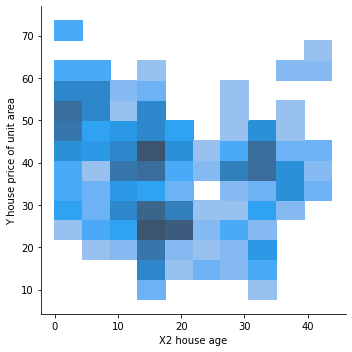

In [37]:
plt.figure(figsize=(14,8))
sns.displot(data2,x='X2 house age',y="Y house price of unit area")

<Figure size 1008x576 with 0 Axes>

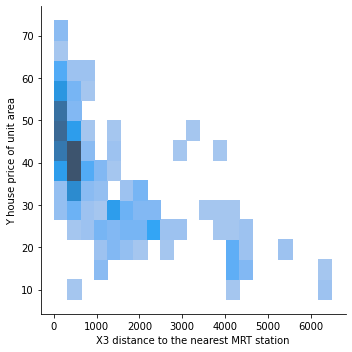

In [38]:
plt.figure(figsize=(14,8))
sns.displot(data2,x='X3 distance to the nearest MRT station',y="Y house price of unit area")

<Figure size 1008x576 with 0 Axes>

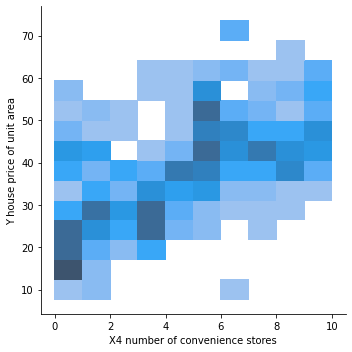

In [39]:
plt.figure(figsize=(14,8))
sns.displot(data2,x='X4 number of convenience stores',y="Y house price of unit area")

<Figure size 1008x576 with 0 Axes>

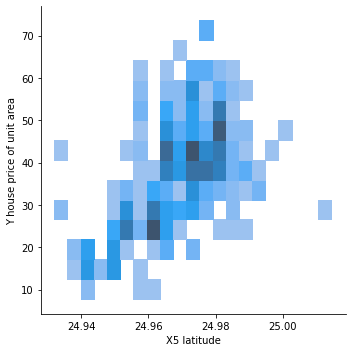

In [40]:
plt.figure(figsize=(14,8))
sns.displot(data2,x='X5 latitude',y="Y house price of unit area")

<Figure size 1008x576 with 0 Axes>

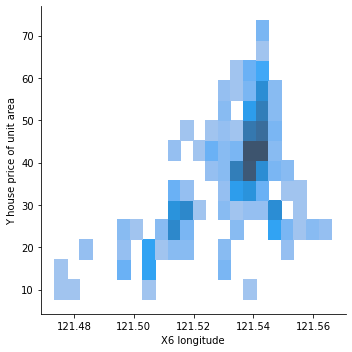

In [41]:
plt.figure(figsize=(14,8))
sns.displot(data2,x='X6 longitude',y="Y house price of unit area")

Model Summary with All Explanatory Variable

In [42]:
from sklearn.model_selection import train_test_split
Y2= data2['Y house price of unit area']
X2= data2.drop(["Y house price of unit area"], axis=1)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.20,random_state=13)
print(X2_train.shape)
print(Y2_train.shape)
print(X2_test.shape)
print(Y2_test.shape)

(328, 5)
(328,)
(83, 5)
(83,)


In [43]:
from sklearn.model_selection import train_test_split
Y2= data2['Y house price of unit area']
X2= data2.drop("Y house price of unit area", axis=1)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.20,random_state=47)
model_mult = sm.OLS(Y2_train,sm.add_constant(X2_train)).fit() 
model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.689
Model:                                    OLS   Adj. R-squared:                  0.684
Method:                         Least Squares   F-statistic:                     142.7
Date:                        Mon, 19 Jul 2021   Prob (F-statistic):           1.90e-79
Time:                                15:05:29   Log-Likelihood:                -1106.3
No. Observations:                         328   AIC:                             2225.
Df Residuals:                             322   BIC:                             2247.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -6521.7556   5455.563     -1.195      0.233   -1.73e+04    4211.293
X2 house age                              -0.3149      0.035     -9.081      0.000      -0.383      -0.247
X3 distance to the nearest MRT station    -0.0037      0.001     -5.883      0.000      -0.005      -0.002
X4 number of convenience stores            1.1890      0.169      7.056      0.000       0.858       1.521
X5 latitude                              258.5156     38.561      6.704      0.000     182.653     334.378
X6 longitude                               0.8958     43.325      0.021      0.984     -84.341      86.132
==============================================================================
Omnibus:                       20.719   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.645
Skew:                           0.213   Prob(JB):                     1.36e-12
Kurtosis:                       4.954   Cond. No.                     2.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
Y3= data2['Y house price of unit area']
X3= data2.drop(["Y house price of unit area","X6 longitude"], axis=1)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,test_size=0.20,random_state=47)
model_mult = sm.OLS(Y3_train,sm.add_constant(X3_train)).fit() 
model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.689
Model:                                    OLS   Adj. R-squared:                  0.685
Method:                         Least Squares   F-statistic:                     178.9
Date:                        Mon, 19 Jul 2021   Prob (F-statistic):           1.33e-80
Time:                                15:05:29   Log-Likelihood:                -1106.3
No. Observations:                         328   AIC:                             2223.
Df Residuals:                             323   BIC:                             2241.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -6410.7056    955.656     -6.708      0.000   -8290.801   -4530.610
X2 house age                              -0.3149      0.035     -9.106      0.000      -0.383      -0.247
X3 distance to the nearest MRT station    -0.0037      0.000     -8.819      0.000      -0.005      -0.003
X4 number of convenience stores            1.1887      0.168      7.097      0.000       0.859       1.518
X5 latitude                              258.4287     38.272      6.752      0.000     183.135     333.722
==============================================================================
Omnibus:                       20.715   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.688
Skew:                           0.212   Prob(JB):                     1.33e-12
Kurtosis:                       4.955   Cond. No.                     4.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X): 
  vif = pd.DataFrame() 
  vif["variables"] = X.columns 
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
  return(vif) 
calc_vif(X3_train).round(2)

,variables,VIF
0,X2 house age,3.41
1,X3 distance to the nearest MRT station,2.83
2,X4 number of convenience stores,4.56
3,X5 latitude,9.33


No Multicolleniarity is present

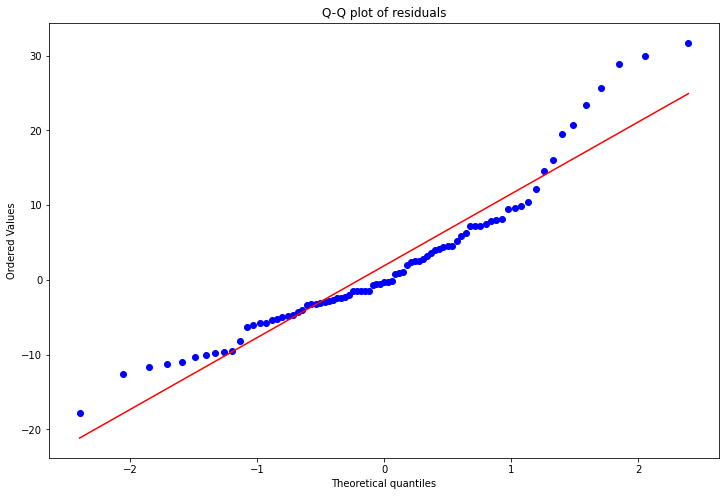

In [46]:
plt.figure(figsize=(12,8))
pred_mult = model_mult.predict(sm.add_constant(X3_test))
resid_mult = Y3_test - pred_mult 
stats.probplot(resid_mult, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



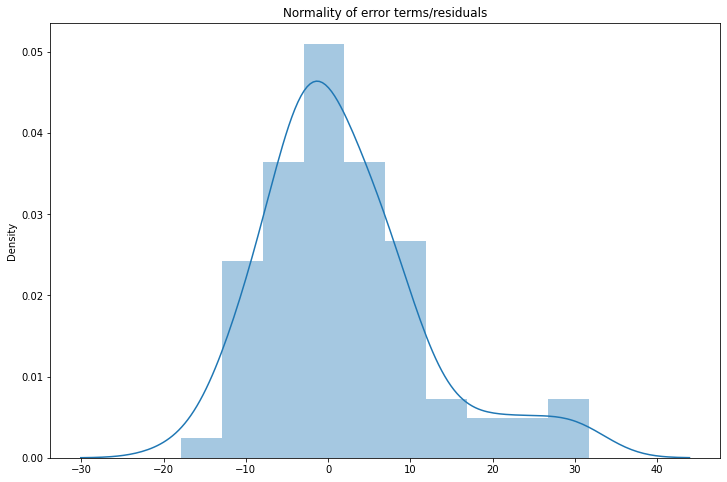

In [47]:
plt.figure(figsize=(12,8))
p = sns.distplot(resid_mult,kde=True)
p = plt.title('Normality of error terms/residuals')

Residual is Approximately Normally Distributed and Leptokurtic

Graphical Representation of Observed Data vs Predicted Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



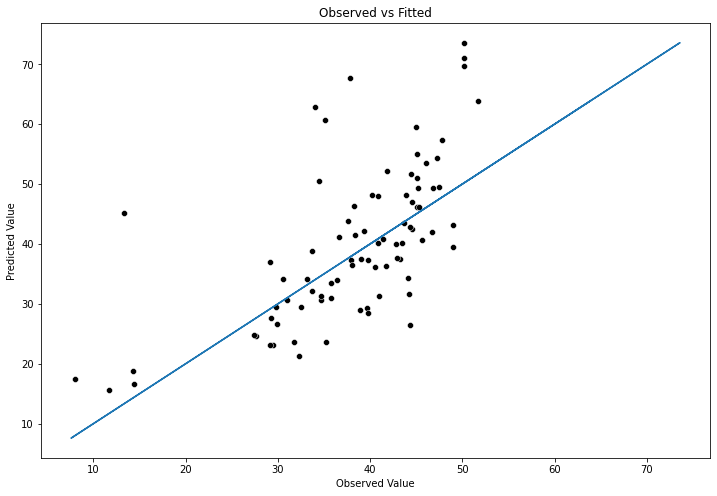

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(pred_mult,Y3,color = 'black') 
plt.xlabel('Observed Value') 
plt.ylabel('Predicted Value') 
plt.plot(Y3,Y3) 
plt.title('Observed vs Fitted') 
plt.show()

In [49]:
pd.DataFrame({'Actual':Y3_test , 'Predicted': pred_mult.round(2)})

,Actual,Predicted
304,29.4,32.47
372,41.5,38.35
147,43.2,48.97
148,45.1,13.37
311,42.2,39.39
...,...,...
166,73.6,50.22
313,42.8,44.35
331,15.6,11.66
276,34.0,36.39


Checking heteroscedasticity 

Goldfeld Quandt Test

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [50]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(resid_mult, X3_test.round(3))
lzip(name, test)

[('F statistic', 1.0505234776315897), ('p-value', 0.4398439134228254)]

Here p - value is greater than level of significance value (alpha =0.05).

so we reject null hypothesis. So Error terms are Homoscedastic.

In [51]:
from scipy import stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



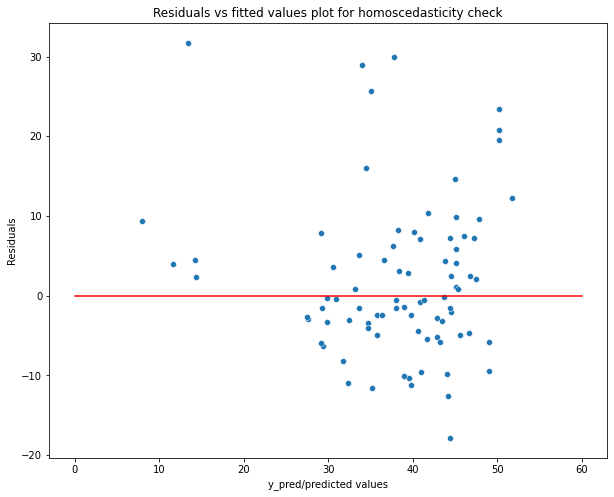

In [52]:
plt.figure(figsize=(10,8))
p = sns.scatterplot(pred_mult,resid_mult)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,60],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Checking for Autocorrelation 

Durbin Watson d-Test

Null Hypothesis: Autocorrelation is not Present

Alternative Hypothesis: Autocorrelation is Present

In [53]:
from statsmodels.stats.stattools import durbin_watson
tests_stats_value= durbin_watson(pred_mult-Y3_test)

In [54]:
print("Durbin Watson Test Statistics Value is : ",tests_stats_value.round(0))

Durbin Watson Test Statistics Value is :  2.0


Here Durbin watson test value is 2.0 which tells that we accept Null hypothesis. That means AutoCorrelation is not present. 

AutoCorrelation Graphical Representation

<Figure size 1440x1440 with 0 Axes>

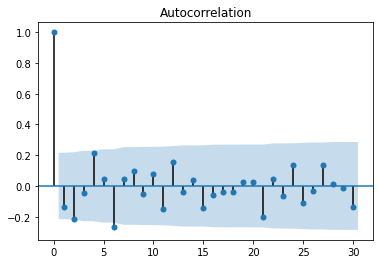

In [55]:
plt.figure(figsize=(20,20))
sm.graphics.tsa.plot_acf(resid_mult, lags=30)
plt.show()

Partial Autocorrelation Graphical Representation

<Figure size 1440x1008 with 0 Axes>

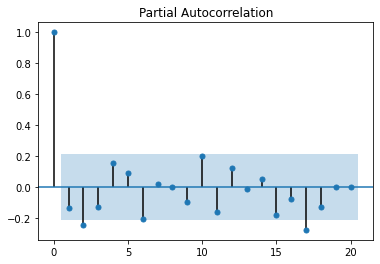

In [56]:
plt.figure(figsize=(20,14))
sm.graphics.tsa.plot_pacf(resid_mult, lags=20)
plt.show()